# Sampling Experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split

/home/rizkiduwinanto/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('../../data/support2.csv')

In [3]:
df

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.000000
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.000000
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.000000
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9102,55.15399,0,female,0,29,347,Coma,Coma,1,11.0,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,13.0,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000


In [4]:
df_observed = df[["death", "d.time"]]
df_observed

,death,d.time
1,0,2029
2,1,4
3,1,47
4,1,133
5,0,2029
...,...,...
9101,0,350
9102,0,347
9103,0,346
9104,1,7


In [5]:
### Split dataset
df_train, df_test = train_test_split(df_observed, stratify=df_observed["death"], test_size=0.2, random_state=42)
test_observed = len(df_test[df_test["death"] == 1])


#### GOAL

Input : y_train (event, survival times),
Output : pdf and cdf of survival times

Evaluation : y_test 

In [6]:
y_train = df_train.to_numpy()
y_test = df_test.to_numpy()

y_train

array([[   1,   60],
       [   1,   10],
       [   0, 1763],
       ...,
       [   0, 1454],
       [   1,   29],
       [   0,  969]])

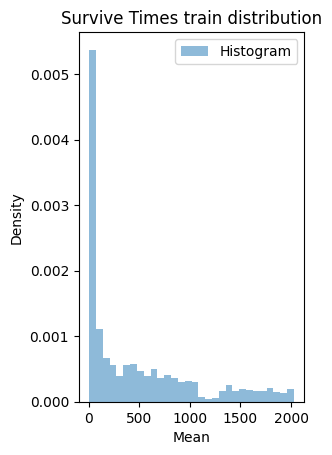

In [7]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.title("Survive Times train distribution")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.legend()

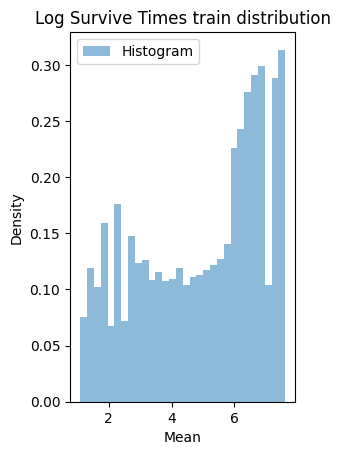

In [8]:
plt.subplot(1, 2, 2)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram")
plt.title("Log Survive Times train distribution")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.legend()

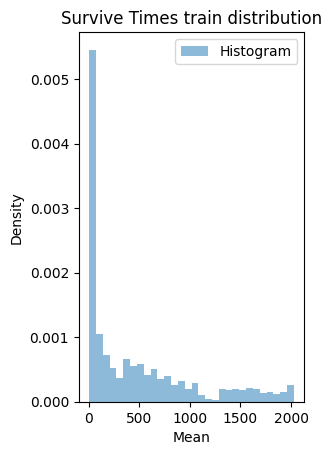

In [9]:
plt.subplot(1, 2, 2)
plt.hist(y_test[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.title("Survive Times train distribution")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.legend()

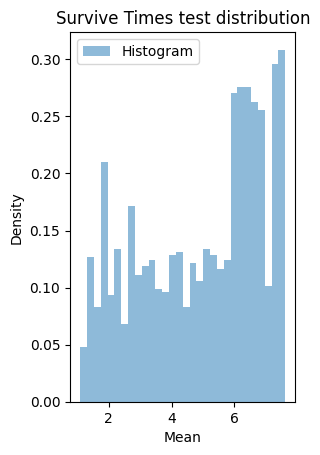

In [10]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_test[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram")
plt.title("Survive Times test distribution")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.legend()

### Parametic survival analysis

### 1 .Weibull Fitting

##### Function input y => pdf, cdf (assuming norm, extreme and logistic)

In [ ]:
from scipy.stats import weibull_min, gaussian_kde

from lifelines import WeibullFitter
from statsmodels.distributions.empirical_distribution import ECDF

In [25]:
wf = WeibullFitter().fit(y_train[:, 1], y_train[:, 0])
wf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 7284 total observations, 2323 right-censored observations>
   number of observations = 7284
number of events observed = 4961
           log-likelihood = -34647.77
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef  se(coef)  coef lower 95%  coef upper 95%
lambda_ 678.47     20.95          637.41          719.54
rho_      0.46      0.01            0.45            0.47

         cmp to      z      p  -log2(p)
lambda_    1.00  32.34 <0.005    759.62
rho_       1.00 -96.15 <0.005       inf
---
AIC = 69299.55

In [26]:
wf.median_survival_time_

307.08187356860583

<Axes: >

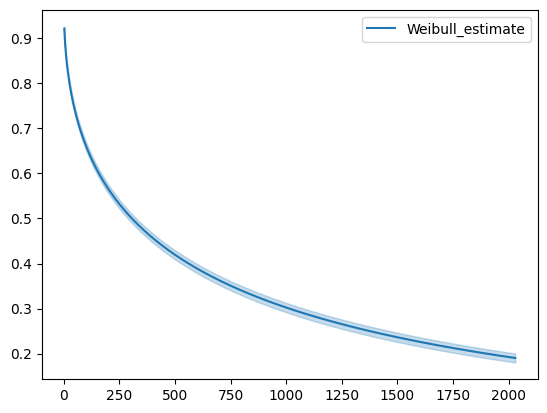

In [13]:
wf.plot_survival_function()

Try with weibull

In [14]:
from scipy.stats import weibull_min

# shape, loc, scale = weibull_min.fit(y_train[:, 1], floc=0)

x = np.linspace(0, max(y_train[:, 1]), 1000)

pdf = weibull_min.pdf(x, wf.rho_, loc=0, scale=wf.lambda_)
cdf = weibull_min.cdf(x, wf.rho_, loc=0, scale=wf.lambda_)

# log_pdf = weibull_min.logpdf(x, shape, loc=loc, scale=scale)
# log_cdf = weibull_min.logcdf(x, shape, loc=loc, scale=scale)

/home/rizkiduwinanto/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:2509: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


In [15]:
pdf

array([           inf, 1.44812192e-02, 9.72258196e-03, 7.66837574e-03,
       6.46453607e-03, 5.65368683e-03, 5.06156998e-03, 4.60562479e-03,
       4.24109382e-03, 3.94136305e-03, 3.68949864e-03, 3.47415272e-03,
       3.28740226e-03, 3.12352803e-03, 2.97828611e-03, 2.84845319e-03,
       2.73153204e-03, 2.62555443e-03, 2.52894564e-03, 2.44042906e-03,
       2.35895752e-03, 2.28366304e-03, 2.21381934e-03, 2.14881354e-03,
       2.08812440e-03, 2.03130551e-03, 1.97797207e-03, 1.92779038e-03,
       1.88046949e-03, 1.83575443e-03, 1.79342069e-03, 1.75326972e-03,
       1.71512522e-03, 1.67883003e-03, 1.64424355e-03, 1.61123960e-03,
       1.57970451e-03, 1.54953567e-03, 1.52064012e-03, 1.49293343e-03,
       1.46633874e-03, 1.44078593e-03, 1.41621082e-03, 1.39255460e-03,
       1.36976325e-03, 1.34778704e-03, 1.32658012e-03, 1.30610013e-03,
       1.28630788e-03, 1.26716703e-03, 1.24864386e-03, 1.23070701e-03,
       1.21332729e-03, 1.19647746e-03, 1.18013211e-03, 1.16426749e-03,
      

PDF of Survival Times

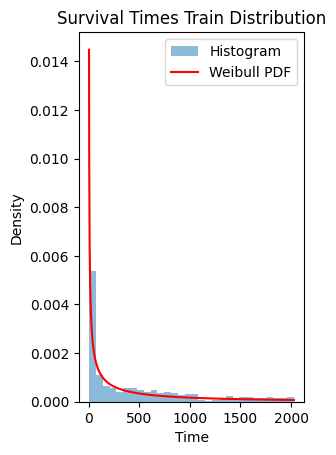

In [16]:
plt.subplot(1, 2, 1)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.plot(x, pdf, 'r-', label="Weibull PDF")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

CDF in Survival Times

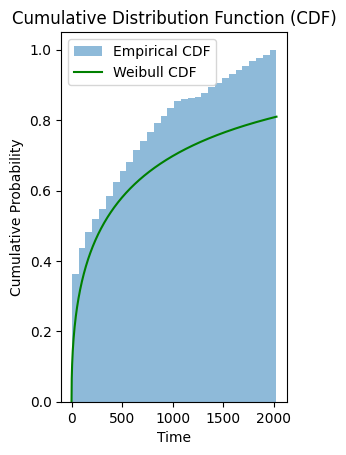

In [17]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF")
plt.plot(x, cdf, 'g-', label="Weibull CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

In [18]:
log_x = np.linspace(np.log(y_train[:, 1].min()), np.log(y_train[:, 1].max()), 1000)
x = np.exp(log_x) 
pdf = weibull_min.pdf(x, wf.rho_, loc=0, scale=wf.lambda_)
cdf = weibull_min.cdf(x, wf.rho_, loc=0, scale=wf.lambda_)

PDF in log survival times

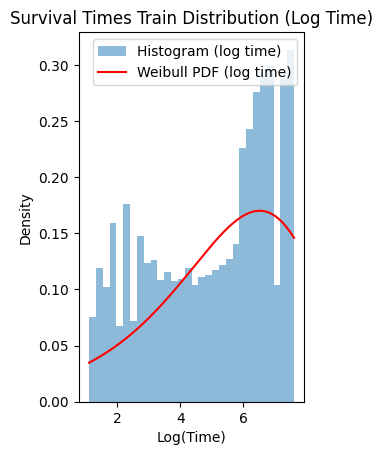

In [19]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram (log time)")
plt.plot(log_x, pdf * x, 'r-', label="Weibull PDF (log time)")
plt.title("Survival Times Train Distribution (Log Time)")
plt.xlabel("Log(Time)")
plt.ylabel("Density")
plt.legend()

CDF in log survival times

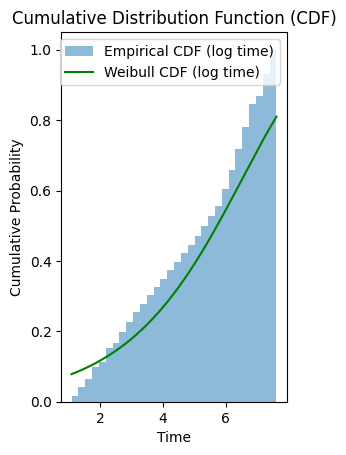

In [20]:
plt.subplot(1, 2, 2)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF (log time)")
plt.plot(log_x, cdf, 'g-', label="Weibull CDF (log time)")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

Boostrap Survival Times

In [21]:
def bootstrap(y, n=1000):
    bootstrap_shapes = []
    bootstrap_scales = []

    for _ in range(n):
        sample_indices = np.random.choice(range(len(y)), len(y) // 10, replace=True)

        resampled_times = y[sample_indices, 1]
        resampled_events = y[sample_indices, 0]

        wf = WeibullFitter().fit(resampled_times, resampled_events)
        bootstrap_shapes.append(wf.rho_)

        bootstrap_scales.append(wf.lambda_)

    mean_shape = np.mean(bootstrap_shapes)
    mean_scale = np.mean(bootstrap_scales)

    return mean_shape, mean_scale

In [22]:
mean_shape, mean_scale = bootstrap(y_train, n=100)

In [23]:
log_x = np.linspace(np.log(y_train[:, 1].min()), np.log(y_train[:, 1].max()), 1000)
x = np.exp(log_x) 

In [24]:
pdf = weibull_min.pdf(x, mean_shape, loc=0, scale=mean_scale)
cdf = weibull_min.cdf(x, mean_shape, loc=0, scale=mean_scale)

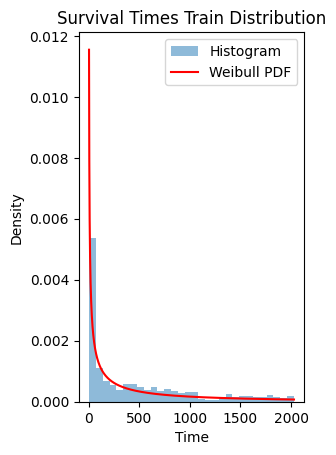

In [25]:
plt.subplot(1, 2, 1)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.plot(x, pdf, 'r-', label="Weibull PDF")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

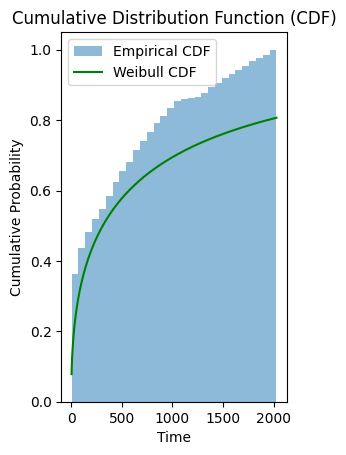

In [26]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF")
plt.plot(x, cdf, 'g-', label="Weibull CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

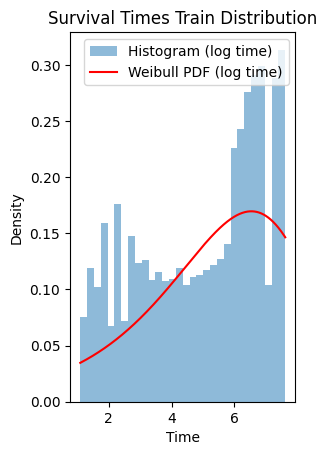

In [27]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram (log time)")
plt.plot(log_x, pdf * x, 'r-', label="Weibull PDF (log time)")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

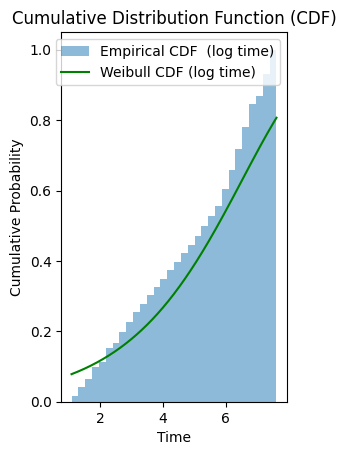

In [28]:
plt.subplot(1, 2, 2)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF  (log time)")
plt.plot(log_x, cdf, 'g-', label="Weibull CDF (log time)")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

### Semi Parametric AFT

### 2. Gaussian Mixture Models

In [29]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [30]:
y_train

array([[   1,   60],
       [   1,   10],
       [   0, 1763],
       ...,
       [   0, 1454],
       [   1,   29],
       [   0,  969]])

In [31]:
gmm = GaussianMixture(n_components=100, random_state=42)

In [32]:
y_train[:, 1]

array([  60,   10, 1763, ..., 1454,   29,  969])

In [33]:
gmm = gmm.fit(y_train[:, 1].reshape(-1, 1))

In [34]:
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)
print("Weights:", gmm.weights_)

Means: [[ 704.92532086]
 [  60.25900183]
 [1632.3274092 ]
 [ 435.83944691]
 [1033.70143279]
 [1951.21107353]
 [1388.67829625]
 [ 196.8132471 ]
 [ 893.87648176]
 [ 562.68842132]
 [   5.24805238]
 [1261.27625515]
 [1819.91753256]
 [ 293.63301998]
 [ 104.93800583]
 [ 775.67566673]
 [1712.95665758]
 [1522.63708165]
 [ 650.69343106]
 [ 502.9953818 ]
 [ 349.2155846 ]
 [  34.52219327]
 [1123.27336009]
 [ 143.6200348 ]
 [1865.28754458]
 [ 821.66476569]
 [ 993.09141162]
 [1342.01988559]
 [ 231.01723751]
 [2013.72024399]
 [1457.18047268]
 [ 466.55495056]
 [1599.71072141]
 [ 386.31322171]
 [ 952.36778031]
 [1053.23221192]
 [ 613.69582495]
 [ 531.83936181]
 [  17.52371665]
 [ 841.88406003]
 [1177.55906838]
 [1772.49763194]
 [ 272.28813865]
 [ 117.011764  ]
 [ 181.91239028]
 [ 420.47529384]
 [1912.83993724]
 [  75.59261137]
 [ 745.20440881]
 [ 331.3845719 ]
 [1495.80652323]
 [  46.23814772]
 [1548.84748124]
 [ 867.29106634]
 [1366.8044886 ]
 [ 171.11046591]
 [ 666.5697611 ]
 [1668.11020289]
 [ 931.

In [35]:
pdf_gmm = gmm.score_samples(x.reshape(-1, 1))
pdf_gmm = np.exp(pdf_gmm)

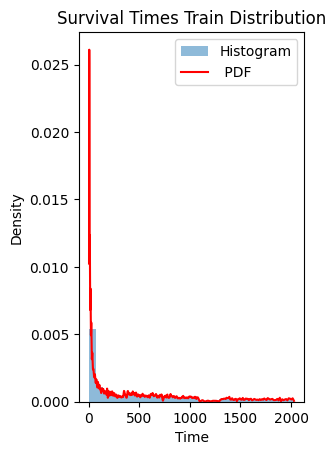

In [36]:
plt.subplot(1, 2, 1)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.plot(x, pdf_gmm, 'r-', label=" PDF")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

In [37]:
from scipy.stats import norm

def mix_norm_cdf(x, means, covs, weights):
    cdf = 0
    for mean, cov, weight in zip(means, covs, weights):
        cdf += weight * norm.cdf(x, mean, np.sqrt(cov))
    return cdf

cdf_gmm = mix_norm_cdf(x, gmm.means_.flatten(), gmm.covariances_.flatten(), gmm.weights_)
cdf_gmm

array([0.00939961, 0.00960238, 0.00980975, 0.01002181, 0.01023867,
       0.01046041, 0.01068714, 0.01091897, 0.01115599, 0.0113983 ,
       0.01164603, 0.01189927, 0.01215812, 0.01242271, 0.01269313,
       0.01296951, 0.01325195, 0.01354056, 0.01383547, 0.01413678,
       0.01444461, 0.01475907, 0.01508029, 0.01540838, 0.01574346,
       0.01608564, 0.01643504, 0.01679179, 0.01715599, 0.01752777,
       0.01790724, 0.01829452, 0.01868973, 0.01909298, 0.01950438,
       0.01992405, 0.0203521 , 0.02078864, 0.02123378, 0.02168763,
       0.02215029, 0.02262186, 0.02310244, 0.02359214, 0.02409104,
       0.02459925, 0.02511683, 0.02564389, 0.02618049, 0.02672672,
       0.02728265, 0.02784835, 0.02842387, 0.02900927, 0.02960461,
       0.03020993, 0.03082526, 0.03145065, 0.03208611, 0.03273167,
       0.03338733, 0.03405311, 0.03472898, 0.03541495, 0.03611098,
       0.03681705, 0.03753312, 0.03825914, 0.03899504, 0.03974076,
       0.04049621, 0.04126131, 0.04203596, 0.04282003, 0.04361

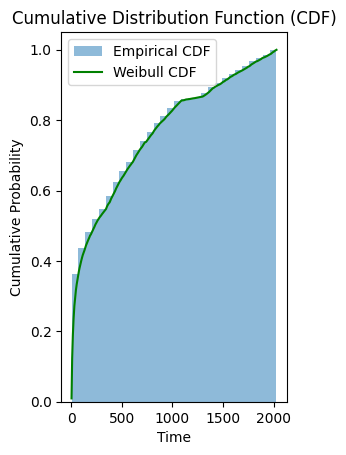

In [38]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF")
plt.plot(x, cdf_gmm, 'g-', label="Weibull CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

In [39]:
log_x = np.linspace(np.log(y_train[:, 1].min()), np.log(y_train[:, 1].max()), 1000)
x = np.exp(log_x) 

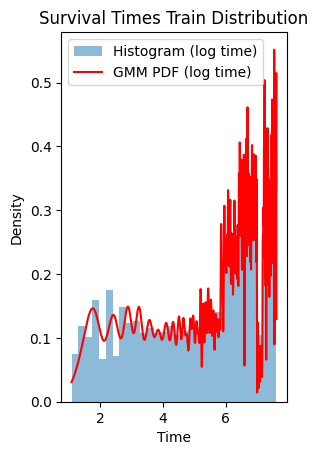

In [40]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram (log time)")
plt.plot(log_x, pdf_gmm * x, 'r-', label="GMM PDF (log time)")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

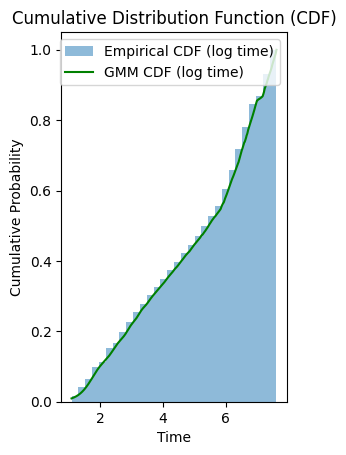

In [41]:
plt.subplot(1, 2, 2)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF (log time)")
plt.plot(log_x, cdf_gmm, 'g-', label="GMM CDF (log time)")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

With Bootstrap

In [42]:
def bootstrap_gmm(y, n_components=100, n=1000):
    bootstrap_means = []
    bootstrap_covs = []
    bootstrap_weights = []

    bootstrap_pdf = []

    log_x = np.linspace(np.log(y_train[:, 1].min()), np.log(y_train[:, 1].max()), 1000)
    x = np.exp(log_x) 

    for _ in range(n):
        sample_indices = np.random.choice(range(len(y)), len(y) // 4, replace=True)

        resampled_times = y[sample_indices, 1]
        resampled_events = y[sample_indices, 0]

        gmm = GaussianMixture(n_components=100)
        gmm = gmm.fit(resampled_times.reshape(-1, 1))

        gmm_pdf = gmm.score_samples(x.reshape(-1, 1))
        gmm_pdf = np.exp(gmm_pdf)

        bootstrap_means.append(gmm.means_)
        bootstrap_covs.append(gmm.covariances_)
        bootstrap_weights.append(gmm.weights_)
        bootstrap_pdf.append(gmm_pdf)

    mean_pdfs = np.mean(bootstrap_pdf, axis=0)
    mean_means = np.mean(bootstrap_means, axis=0)
    mean_covs = np.mean(bootstrap_covs, axis=0)
    mean_weights = np.mean(bootstrap_weights, axis=0)

    return mean_pdfs, mean_means, mean_covs, mean_weights

In [43]:
pdf_b, means, covs, weights = bootstrap_gmm(y_train, n_components=10, n=100)

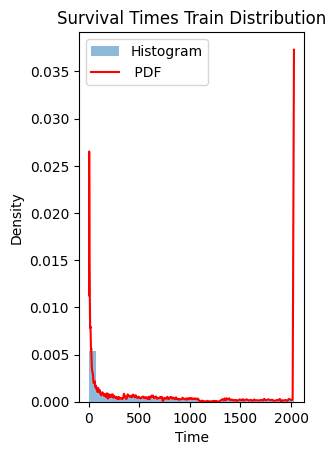

In [44]:
plt.subplot(1, 2, 1)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.plot(x, pdf_b, 'r-', label=" PDF")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

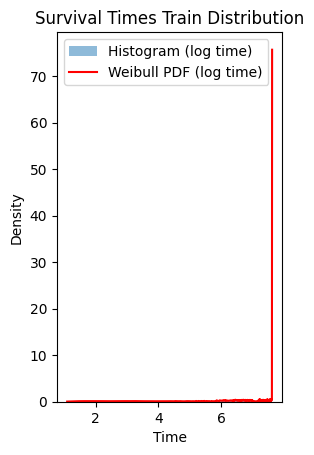

In [45]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram (log time)")
plt.plot(log_x, pdf_b * x, 'r-', label="Weibull PDF (log time)")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

In [46]:
cdf_gmm = mix_norm_cdf(x, means.flatten(), covs.flatten(), weights)
cdf_gmm

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

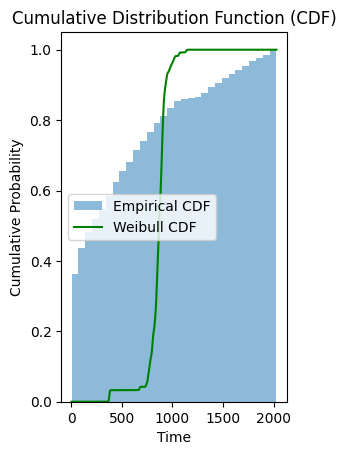

In [47]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF")
plt.plot(x, cdf_gmm, 'g-', label="Weibull CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

With Censoring (in mind)

### 3. Log Normal

In [48]:
from lifelines import LogNormalFitter

lnf = LogNormalFitter().fit(y_train[:, 1], y_train[:, 0])
lnf.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 7284 total observations, 2323 right-censored observations>
   number of observations = 7284
number of events observed = 4961
           log-likelihood = -34215.20
               hypothesis = mu_ != 0, sigma_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
mu_     5.51      0.03            5.44            5.57
sigma_  2.64      0.03            2.59            2.70

        cmp to      z      p  -log2(p)
mu_       0.00 165.40 <0.005       inf
sigma_    1.00  57.45 <0.005       inf
---
AIC = 68434.40

<Axes: >

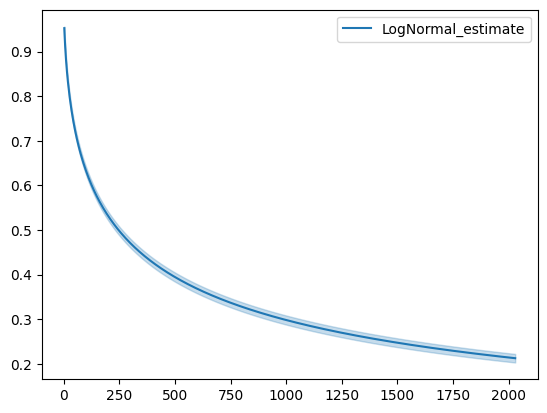

In [49]:
lnf.plot_survival_function()

In [50]:
lnf = LogNormalFitter()
lnf.fit(y_train[:, 1])


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 7284 total observations, 0 right-censored observations>

In [51]:
from scipy.stats import lognorm

x = np.linspace(0, max(y_train[:, 1]), 1000)

pdf = lognorm.pdf(x, lnf.sigma_, loc=0, scale=np.exp(lnf.mu_))
cdf = lognorm.cdf(x, lnf.sigma_, loc=0, scale=np.exp(lnf.mu_))

In [52]:
# from scipy.stats import lognorm

# shape, loc, scale = lognorm.fit(y_train[:, 1], floc=0)

# x = np.linspace(0, max(y_train[:, 1]), 1000)

# pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
# cdf = lognorm.cdf(x, shape, loc=loc, scale=scale)

# log_pdf = lognorm.logpdf(x, shape, loc=loc, scale=scale)
# log_cdf = lognorm.logcdf(x, shape, loc=loc, scale=scale)

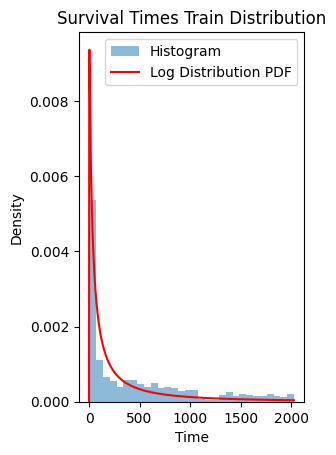

In [53]:
plt.subplot(1, 2, 1)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.plot(x, pdf, 'r-', label="Log Distribution PDF")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

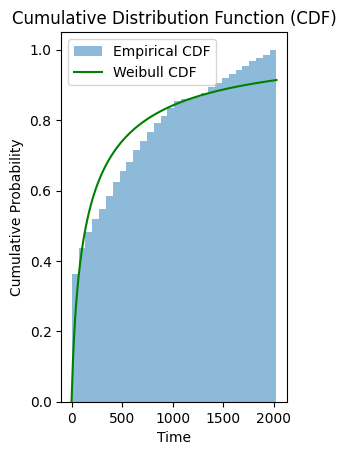

In [54]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF")
plt.plot(x, cdf, 'g-', label="Weibull CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

In [55]:
log_x = np.linspace(np.log(y_train[:, 1].min()), np.log(y_train[:, 1].max()), 1000)
x = np.exp(log_x) 
# pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)
# cdf = weibull_min.cdf(x, shape, loc=loc, scale=scale)

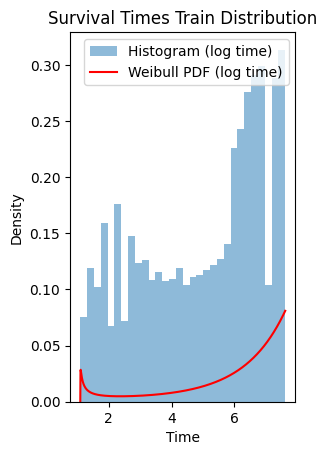

In [56]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram (log time)")
plt.plot(log_x, pdf * x, 'r-', label="Weibull PDF (log time)")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

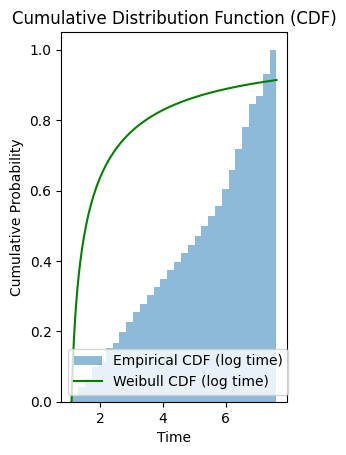

In [57]:
plt.subplot(1, 2, 2)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF (log time)")
plt.plot(log_x, cdf, 'g-', label="Weibull CDF (log time)")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

### 4. Log Logistic Distribution

In [58]:
from lifelines import LogLogisticFitter

llf = LogLogisticFitter().fit(y_train[:, 1], y_train[:, 0])
llf.print_summary()

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 7284 total observations, 2323 right-censored observations>
   number of observations = 7284
number of events observed = 4961
           log-likelihood = -34386.47
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef  se(coef)  coef lower 95%  coef upper 95%
alpha_ 235.70      8.11          219.81          251.59
beta_    0.62      0.01            0.60            0.63

        cmp to      z      p  -log2(p)
alpha_    1.00  28.95 <0.005    609.81
beta_     1.00 -53.21 <0.005       inf
---
AIC = 68776.95

<Axes: >

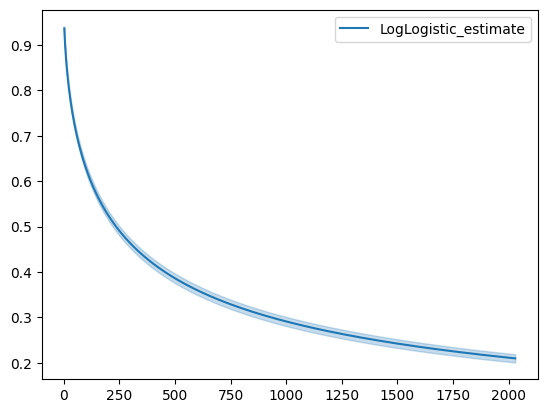

In [59]:
llf.plot_survival_function()

In [60]:
from scipy.stats import fisk

x = np.linspace(0, max(y_train[:, 1]), 1000)

pdf = fisk.pdf(x, lnf.sigma_, loc=0, scale=np.exp(lnf.mu_))
cdf = fisk.cdf(x, lnf.sigma_, loc=0, scale=np.exp(lnf.mu_))

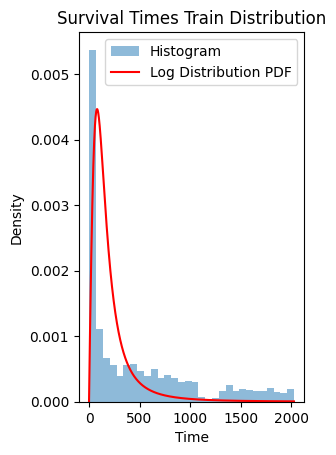

In [61]:
plt.subplot(1, 2, 1)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, label="Histogram")
plt.plot(x, pdf, 'r-', label="Log Distribution PDF")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

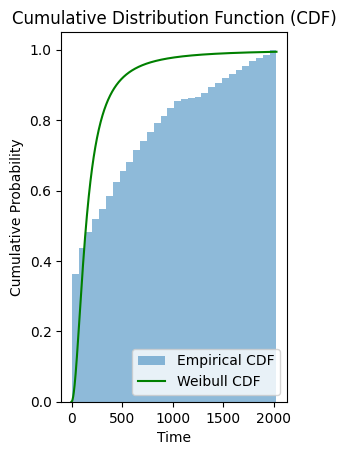

In [62]:
plt.subplot(1, 2, 2)
plt.hist(y_train[:, 1], bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF")
plt.plot(x, cdf, 'g-', label="Weibull CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()

In [63]:
log_x = np.linspace(np.log(y_train[:, 1].min()), np.log(y_train[:, 1].max()), 1000)
x = np.exp(log_x) 

pdf = fisk.pdf(x, lnf.sigma_, loc=0, scale=np.exp(lnf.mu_))
cdf = fisk.cdf(x, lnf.sigma_, loc=0, scale=np.exp(lnf.mu_))

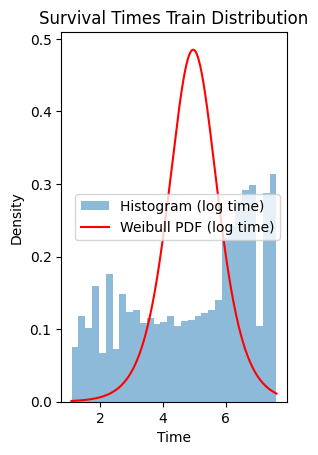

In [64]:
plt.subplot(1, 2, 1)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, label="Histogram (log time)")
plt.plot(log_x, pdf * x, 'r-', label="Weibull PDF (log time)")
plt.title("Survival Times Train Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()

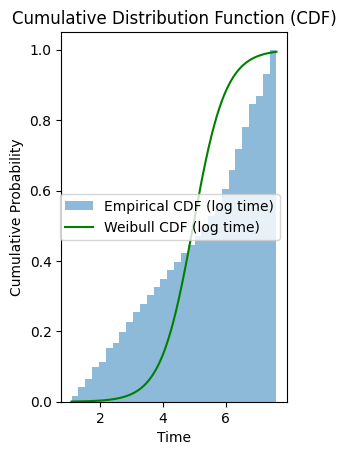

In [65]:
plt.subplot(1, 2, 2)
plt.hist(np.log(y_train[:, 1]), bins=30, density=True, alpha=0.5, cumulative=True, label="Empirical CDF (log time)")
plt.plot(log_x, cdf, 'g-', label="Weibull CDF (log time)")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Time")
plt.ylabel("Cumulative Probability")
plt.legend()